In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
dados = load_breast_cancer()
X = dados.data
Y = dados.target

In [3]:
dados_treino, dados_teste, rotulos_treino, rotulos_teste = train_test_split(X, Y,
                                          test_size = 0.2,
                                          random_state=42,
                                          stratify=Y)

In [4]:
#Arvore de decisão
dtc = DecisionTreeClassifier()
dtc.fit(dados_treino, rotulos_treino)

DecisionTreeClassifier()

In [5]:
rotulos_preditos = dtc.predict(dados_teste)
accuracy_score(rotulos_teste, rotulos_preditos)

0.9035087719298246

In [6]:
tr_acc = []
tr_std = []

In [7]:
for this_md in range(2,30):
  dtc = DecisionTreeClassifier(max_depth=this_md)
  dtc.fit(dados_treino, rotulos_treino)
  scores = cross_val_score(dtc, dados_treino, rotulos_treino, cv=10)
  tr_acc.append(scores.mean())
  tr_std.append(np.std(scores))

<ErrorbarContainer object of 3 artists>

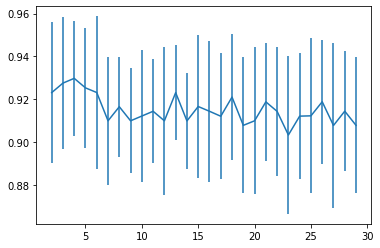

In [8]:
plt.errorbar(x=range(2,30), y=tr_acc, yerr=tr_std)

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['entropy', 'gini'],
              'max_depth': range(2,30,2),
              'min_samples_leaf': range(2,10,2),
              'min_impurity_decrease': np.linspace(0,0.5,10)}

In [10]:
dtc = DecisionTreeClassifier()
gs = GridSearchCV(dtc, param_grid=param_grid)
gs.fit(dados_treino, rotulos_treino)
gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2)

In [11]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=8)
dtc.fit(dados_treino, rotulos_treino)
rotulos_preditos = dtc.predict(dados_teste)
accuracy_score(rotulos_teste, rotulos_preditos)

0.9385964912280702